In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
from scipy import stats
import requests
import json
import matplotlib.pyplot as plt
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
wash = pd.read_csv('access_wash_data.csv')
wash.head()

,pct_access_wash,access_wash_se,pct_access_wash_unw,access_wash_se_unw,sample_size,country,iso_code,gid_0,survey_date
0,0.923771,0.019397,0.924731,0.019510,186,Afghanistan,AFG,AFG,20200627
1,0.980653,0.017253,0.941176,0.010100,187,Afghanistan,AFG,AFG,20200628
2,0.920830,0.020278,0.927273,0.021084,165,Afghanistan,AFG,AFG,20200629
3,0.957727,0.019921,0.935065,0.016267,154,Afghanistan,AFG,AFG,20200630
4,0.959285,0.019432,0.936709,0.015773,158,Afghanistan,AFG,AFG,20200701


In [11]:
wash['iso_code'].value_counts()

BGD    237
BRA    237
CAN    237
BOL    237
BEL    237
AUS    237
ARG    237
AUT    236
BGR    236
BLR    233
DZA    213
BIH    171
CHL    145
AFG     91
ALB     75
AZE     71
AGO     20
ARM     10
KHM      2
Name: iso_code, dtype: int64

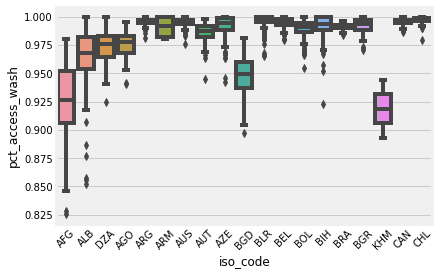

In [12]:
sns.boxplot(x='iso_code', y='pct_access_wash', data=wash)
plt.xticks(rotation=45)
plt.show()

In [13]:
# request data from api
response = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_fam&type=daily&country=all&daterange=20200621-20210219").text

#convert json data to dic data for use!
jsonData = json.loads(response)
vaccine_list = list(jsonData.values())[0]
df = pd.DataFrame(vaccine_list)

In [14]:
df = df[['pct_trust_fam', 'iso_code', 'survey_date']]
df.head()

,pct_trust_fam,iso_code,survey_date
0,0.543085,AFG,20201222
1,0.563286,AFG,20201225
2,0.533565,AFG,20201226
3,0.562064,AFG,20201227
4,0.501051,AFG,20201229


In [15]:
df.to_csv('percent_data.csv', index = False)

In [16]:
trust_fam_df = pd.read_csv('percent_data.csv', index_col='survey_date', parse_dates=['survey_date'])
trust_fam_df.head(5)

,pct_trust_fam,iso_code
survey_date,,
2020-12-22,0.543085,AFG
2020-12-25,0.563286,AFG
2020-12-26,0.533565,AFG
2020-12-27,0.562064,AFG
2020-12-29,0.501051,AFG


In [17]:
trust_fam_df = trust_fam_df.pivot_table(index=["survey_date"], 
                    columns="iso_code", 
                    values="pct_trust_fam")

In [23]:
trust_fam_df = trust_fam_df.rename_axis('date')

In [31]:
trust_fam_df.columns = ['pct_trust_fam_' + col for col in trust_fam_df.columns]

In [32]:
trust_fam_df.head()

,pct_trust_fam_AFG,pct_trust_fam_ARG,pct_trust_fam_AUS,pct_trust_fam_AUT,pct_trust_fam_AZE,pct_trust_fam_BEL,pct_trust_fam_BGD,pct_trust_fam_BGR,pct_trust_fam_BIH,pct_trust_fam_BLR,pct_trust_fam_BOL,pct_trust_fam_BRA,pct_trust_fam_CAN,pct_trust_fam_DZA
date,,,,,,,,,,,,,,
2020-12-21,NaN,0.402637,0.324230,0.203360,NaN,0.116095,0.627122,NaN,NaN,NaN,0.437822,0.462499,0.291629,NaN
2020-12-22,0.543085,0.407921,0.309041,0.243236,0.273597,0.241203,0.645454,0.239188,0.321158,0.187821,0.465308,0.456605,0.306758,0.216259
2020-12-23,NaN,0.388399,0.304198,0.243975,0.342346,0.193669,0.661436,0.273317,0.351580,0.199477,0.513359,0.456173,0.287857,0.236067
2020-12-24,NaN,0.393851,0.317064,0.260573,NaN,0.208304,0.623666,0.284341,0.317533,0.289817,0.574923,0.460410,0.321119,0.188153
2020-12-25,0.563286,0.390345,0.304963,0.243688,NaN,0.238989,0.651998,0.266767,0.268953,0.241124,0.514741,0.457903,0.318675,0.194307


In [33]:
trust_fam_df = trust_fam_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [34]:
trust_fam_df.head()

,pct_trust_fam_AFG,pct_trust_fam_ARG,pct_trust_fam_AUS,pct_trust_fam_AUT,pct_trust_fam_AZE,pct_trust_fam_BEL,pct_trust_fam_BGD,pct_trust_fam_BGR,pct_trust_fam_BIH,pct_trust_fam_BLR,pct_trust_fam_BOL,pct_trust_fam_BRA,pct_trust_fam_CAN,pct_trust_fam_DZA
date,,,,,,,,,,,,,,
2020-12-21,0.519755,0.402637,0.324230,0.203360,0.266539,0.116095,0.627122,0.278046,0.326954,0.213203,0.437822,0.462499,0.291629,0.248378
2020-12-22,0.543085,0.407921,0.309041,0.243236,0.273597,0.241203,0.645454,0.239188,0.321158,0.187821,0.465308,0.456605,0.306758,0.216259
2020-12-23,0.519755,0.388399,0.304198,0.243975,0.342346,0.193669,0.661436,0.273317,0.351580,0.199477,0.513359,0.456173,0.287857,0.236067
2020-12-24,0.519755,0.393851,0.317064,0.260573,0.266539,0.208304,0.623666,0.284341,0.317533,0.289817,0.574923,0.460410,0.321119,0.188153
2020-12-25,0.563286,0.390345,0.304963,0.243688,0.266539,0.238989,0.651998,0.266767,0.268953,0.241124,0.514741,0.457903,0.318675,0.194307
